# Package_Apply

In [13]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils);

route_data_script = joinpath("..", "src", "package_data.jl")
include(route_data_script);

data_json = joinpath("..", "data", "model_apply_inputs", "new_package_data.json");
package_data = read_json(data_json);

In [14]:
@time data = parse_package_data(package_data);

  0.269983 seconds (522.21 k allocations: 29.104 MiB, 5.13% gc time, 93.81% compilation time)


### Grafico de numero de paradas por ruta

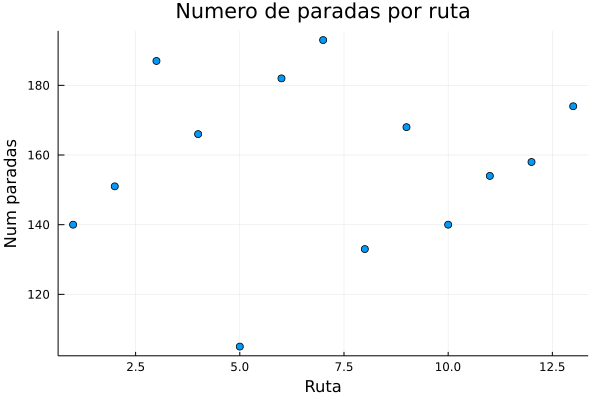

In [15]:
using Plots

num_paradas_por_ruta = [length(stops(d)) for d in data]
m = length(num_paradas_por_ruta)

plot(1:m, num_paradas_por_ruta, seriestype=:scatter, xlab="Ruta", ylab="Num paradas", lab="", title="Numero de paradas por ruta")

In [17]:
using Statistics

In [22]:
mean(num_paradas_por_ruta)

157.76923076923077

### Numero de paquetes por parada y por ruta

In [26]:
num_packages_route1 = [length(packages(S)) for S in stops(data[1])]

m = length(num_packages_route1)

140

In [36]:
function packages_per_stop_plot(route_id::Int)
    vec = [length(packages(S)) for S in stops(data[route_id])]
    str = "Numero de paquetes por parada (Ruta $route_id)"
    plot(1:length(vec), vec, seriestype=:scatter, xlab="Parada", ylab="Num Paquetes", lab="", title=str)
end

function packages_per_stop_plot(route_id::AbstractVector{Int})
    str = "Numero de paquetes por parada"
    fig = plot(title=str, xlab="Parada", ylab="Num Paquetes")

    for r in route_id
        vec = [length(packages(S)) for S in stops(data[r])]
        plot!(fig, 1:length(vec), vec, seriestype=:scatter, lab="$r")
    end
    return fig
end

packages_per_stop_plot (generic function with 4 methods)

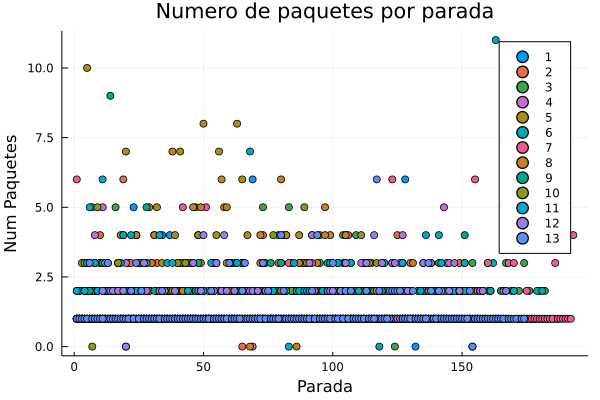

In [40]:
packages_per_stop_plot(1:13)

---

In [ ]:
using Plots

num_packages = Vector{Int64}(undef,length(data))

for i in 1:length(data)
    for S in data[i].stops_package
        num_packages[i] += length(S.package)
    end
end

plot(1:length(data), num_packages, seriestype=:scatter, xlab="Ruta", ylab="Num Paquetes", lab="", title="Numero de paquetes por ruta")
#plot(1:140, [length(R.package) for R in data[1].stops_package], seriestype=:scatter, xlab="Parada", ylab="Num Paquetes", lab="", title="Numero de paquetes por parada")

In [ ]:
using Plots

function service_time_per_package(route_num)
    service_time = Vector{Float64}(undef, maximum(num_packages))
    i = 1
    for S in data[route_num].stops_package
        for P in S.package
            service_time[i] = P.planned_service
            i += 1
        end
    end
    return service_time
end

In [ ]:
service_time_package(route_num) = plot(1:length(data[route_num].stops_package), service_time_per_package(route_num), seriestype=:scatter, xlab="Paquete", ylab="Planned Service [seconds]", lab="", title="Planned Service por Paquete (Ruta "*string(route_num)*")")

In [45]:
function dimensions_per_package(route_id)
    out = Vector{Float64}()
    for S in stops(data[route_id])
        for P in packages(S)
            push!(out, volume(P))
        end
    end
    return out
end

dimensions_per_package (generic function with 1 method)

In [46]:
dimensions_per_package(1)

212-element Vector{Float64}:
  1991.202
 22605.048000000003
 22605.048000000003
  9522.192000000001
  3436.112
   679.6800000000001
  1768.7040000000002
  9555.48
 13297.312
  5741.924
  3524.864000000001
  1845.984
  1113.42
     ⋮
  1451.936
  5985.9800000000005
  3436.112
 13297.312
  4303.026
 24227.28
  9160.127999999999
   487.5
  4053.861
  5833.828
  5741.924
  9160.127999999999

In [ ]:
# TODO
# dimensions_package(route_num) = plot(1:length(data[route_num].stops_package), dimensions_per_package(route_num), seriestype=:scatter, xlab="Paquete", ylab="Dimensions [cm3]", lab="", title="Dimensions por Paquete (Ruta "*string(route_num)*")")

In [ ]:
# dimensions_package(1)

# Package_Build

In [ ]:
data_structures = joinpath("..", "src", "data_structures.jl")
include(data_structures)

utils = joinpath("..", "src", "utils.jl")
include(utils)

route_data_script = joinpath("..", "src", "package_build_data.jl")
include(route_data_script);

data_json = joinpath("..", "data", "model_build_inputs", "package_data.json");
package_data2 = read_json(data_json)

@time data2 = parse_package_build_data(package_data2);

In [ ]:
length(data2)

In [ ]:
using Plots

num_paradas2 = [length(R.stops_package) for R in data2]

plot(1:300, [length(R.stops_package) for R in data2], seriestype=:scatter, xlab="Ruta", ylab="Num paradas", lab="", title="Numero de paradas por ruta")

In [ ]:
using Statistics
mean(num_paradas2)

In [ ]:
using Plots

num_packages2 = Vector{Int64}(undef,length(data2))

for i in 1:length(data2)
    for S in data2[i].stops_package
        num_packages2[i] += length(S.package)
    end
end

plot(1:300, num_packages2, seriestype=:scatter, xlab="Ruta", ylab="Num Paquetes", lab="", title="Numero de paquetes por ruta")
#plot(1:140, [length(R.package) for R in data[1].stops_package], seriestype=:scatter, xlab="Parada", ylab="Num Paquetes", lab="", title="Numero de paquetes por parada")

In [ ]:
using Statistics
println("MAXIMO Paquets por Ruta: "*string(maximum(num_packages2)))
println("MINIMO Paquets por Ruta: "*string(minimum(num_packages2)))
promedio_packages_per_route = mean(num_packages2)
println("PROMEDIO Paquets por Ruta: "*string(promedio_packages_per_route))
println("Superiores al promedio: "*string(length(filter(x->x>promedio_packages_per_route, num_packages2)))*" Rutas")
println("Inferiores al promedio: "*string(length(filter(x->x<promedio_packages_per_route, num_packages2)))*" Rutas")

In [ ]:
using Plots

function service_time_per_package2(route_num)
    service_time = Vector{Float64}(undef, maximum(num_packages2))
    i = 1
    for S in data2[route_num].stops_package
        for P in S.package
            service_time[i] = P.planned_service
            i += 1
        end
    end
    return service_time
end

In [ ]:
function service_time_package2(route_num)
    service_time_perPackage = service_time_per_package2(route_num)
    plot(1:length(data2[route_num].stops_package), service_time_perPackage, seriestype=:scatter, xlab="Paquete", ylab="Planned Service [seconds]", lab="", title="Planned Service por Paquete (Ruta "*string(route_num)*")")
    
    #println("MAXIMO Planned Service por Paquete: "*string(maximum(service_time_perPackage)))
    #println("MINIMO Planned Service por Paquete: "*string(minimum(service_time_perPackage)))
    #promedio_service_time_per_package = mean(service_time_perPackage)
    #println("PROMEDIO Planned Service por Paquete en Ruta "*string(route_num)*": "*string(promedio_service_time_per_package))
    #println("Superiores al promedio: "*string(length(filter(x->x>promedio_service_time_per_package, service_time_perPackage)))*" Paquetes en Ruta "*string(route_num))
    #println("Inferiores al promedio: "*string(length(filter(x->x<promedio_service_time_per_package, service_time_perPackage)))*" Paquetes en Ruta "*string(route_num))
end

In [ ]:
function service_time_package2(route_num)
    plot(1:length(data2[route_num].stops_package), service_time_per_package2(route_num), seriestype=:scatter, xlab="Paquete", ylab="Planned Service [seconds]", lab="", title="Planned Service por Paquete (Ruta "*string(route_num)*")")
end

In [ ]:
service_time_package2(3)

In [ ]:
using Plots

function get_status_ranges_service_time(route_num)
    
    status_rej_package = Vector{Float64}(undef, maximum(num_packages2))
    status_att_package = Vector{Float64}(undef, maximum(num_packages2))
    status_del_package = Vector{Float64}(undef, maximum(num_packages2))
    #status_other = Vector{Float64}(undef, maximum(num_packages2))
    i = 1
    for S in data2[route_num].stops_package
        for P in S.package
            if(P.scan_status==1)
                status_rej_package[i] = P.planned_service
                status_att_package[i] = 0
                status_del_package[i] = 0
            end
            if(P.scan_status==2)
                status_rej_package[i] = 0
                status_att_package[i] = P.planned_service
                status_del_package[i] = 0
            end
            if(P.scan_status==3)
                status_rej_package[i] = 0
                status_att_package[i] = 0
                status_del_package[i] = P.planned_service
            end
            i += 1
        end
    end
    
    return status_rej_package, status_att_package, status_del_package
end

In [ ]:
function plot_service_time(route_num)
    println("ROUTE: "*string(data2[route_num].hex_hash))
    status_rej, status_att, status_del = get_status_ranges_service_time(route_num)
    plot(1:length(data2[route_num].stops_package), status_del, c=:green, ylimit=(1,maximum(num_packages2)), seriestype=:scatter, xlab="Paquete", ylab="Planned Service [seconds]", label="Delivered", title="Planned Service por Paquete (Ruta "*string(route_num)*")")
    plot!(1:length(data2[route_num].stops_package), status_att, c=:yellow, seriestype=:scatter, label="Attempted")
    plot!(1:length(data2[route_num].stops_package), status_rej, c=:red, seriestype=:scatter, label="Rejected")
end

In [ ]:
plot_service_time(5)

In [ ]:
using Plots

function calculate_volume(depth, height, width)
    return depth*height*width
end

function dimensions_per_package2(route_num)
    dimensions_package = Vector{Float64}(undef, maximum(num_packages2))
    i = 1
    for S in data2[route_num].stops_package
        for P in S.package
            dimensions_package[i] = calculate_volume(P.dimensions.depth, P.dimensions.height, P.dimensions.width)
            i += 1
        end
    end
    return dimensions_package
end

In [ ]:
dimensions_package2(route_num) = plot(1:length(data2[route_num].stops_package), dimensions_per_package2(route_num), seriestype=:scatter, xlab="Paquete", ylab="Dimensions [cm3]", lab="", title="Dimensions por Paquete (Ruta "*string(route_num)*")")

In [ ]:
dimensions_package2(1)

In [ ]:
using Plots

function get_status_ranges_dimensions(route_num)
    
    status_rej_package = Vector{Float64}(undef, maximum(num_packages2))
    status_att_package = Vector{Float64}(undef, maximum(num_packages2))
    status_del_package = Vector{Float64}(undef, maximum(num_packages2))
    #status_other = Vector{Float64}(undef, maximum(num_packages2))
    i = 1
    for S in data2[route_num].stops_package
        for P in S.package
            if(P.scan_status==1)
                status_rej_package[i] = calculate_volume(P.dimensions.depth, P.dimensions.height, P.dimensions.width)
                status_att_package[i] = 0
                status_del_package[i] = 0
            end
            if(P.scan_status==2)
                status_rej_package[i] = 0
                status_att_package[i] = calculate_volume(P.dimensions.depth, P.dimensions.height, P.dimensions.width)
                status_del_package[i] = 0
            end
            if(P.scan_status==3)
                status_rej_package[i] = 0
                status_att_package[i] = 0
                status_del_package[i] = calculate_volume(P.dimensions.depth, P.dimensions.height, P.dimensions.width)
            end
            i += 1
        end
    end
    
    return status_rej_package, status_att_package, status_del_package
end

In [ ]:
function plot_dimensions(route_num)
    println("ROUTE: "*string(data2[route_num].hex_hash))
    status_rej_dim, status_att_dim, status_del_dim = get_status_ranges_dimensions(route_num)
    plot(1:length(data2[route_num].stops_package), status_del_dim, c=:green, ylimit=(1,maximum(dimensions_per_package2(route_num))+1000), seriestype=:scatter, xlab="Paquete", ylab="Dimensions [cm3]", label="Delivered", title="Dimensiones por Paquete (Ruta "*string(route_num)*")")
    plot!(1:length(data2[route_num].stops_package), status_att_dim, c=:yellow, seriestype=:scatter, label="Attempted")
    plot!(1:length(data2[route_num].stops_package), status_rej_dim, c=:red, seriestype=:scatter, label="Rejected")
end

In [ ]:
plot_dimensions(5)

In [ ]:
data2[1]